In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

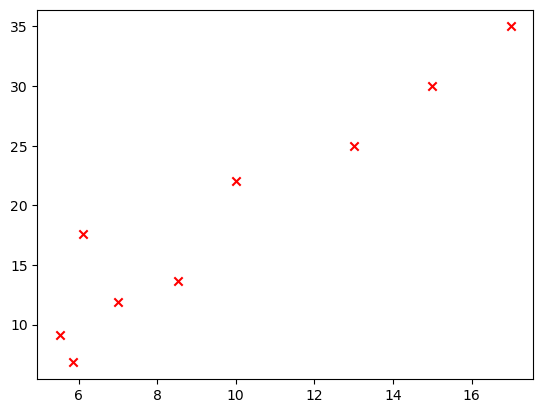

In [2]:
# Data for example
x_train = np.array( [6.1101, 10,13,15,17,5.5277, 8.5186, 7.0032, 5.8598])
y_train = np.array([17.592,22,25,30,35, 9.1302, 13.662,  11.854,  6.8233])
plt.scatter(x = x_train,y = y_train,marker='x',color = 'r')

**Goal**
- Our goal is to implement a model which can predicate `y_train` based on only one feature `x_train`.
- We will use <b>Linear Regression model</b> to predicate the incoming `x_test`

- The first step is calculating the cost function which will measure the error in our model 

- To remember $$\mathbf f_{w,b}(x^{(i)}) = wx^{(i)}+b $$

- Cost function : $$\mathbf cost^{(i)} = (f(x)^{(i)} - y^{(i)})^2$$

- Total cost: $$\mathbf j_{(w,b)} = 1/2m \sum\limits_{i=0}^{m-1} cost^{(i)} $$

In [9]:
x_train.shape[0]

9

In [14]:
def cost_func (x,y,w,b):
    cost = 0
    m = x.shape[0]
    
    for i in range(m):
        h = w*x[i] + b
        e = (h-y[i])**2
        cost = cost + e
    return (1/(2*m))*cost

In [15]:
cost_func(x_train,y_train,0.001,1)

203.5357426865134

**Good so far !!**

- Now let's compute the gradient descent function:
    - we have two parameter to update w,b ![image.png](attachment:image.png)

In [18]:
def gradient_func(x,y,w,b):

    m = x.shape[0]
    w_ = 0
    b_ = 0
    for i in range(m):
        
        f_x = w*x[i] +b
        w_ = w_ + ((f_x -y[i])*x[i])
        b_ = b_ + (f_x - y[i])
    
    return np.array([[(1/m)*w_],[(1/m)*b_]])


In [40]:
np.linalg.norm(np.array([[1],
                         [2]]),1)<1

False

In [45]:
gradient_func(x_train,y_train,0.001,1)[1][0]

-17.997053400000002

In [27]:
np.linalg.norm(v,1)

228.9205942531622

In [106]:
def generate_parameters(x,y,w_in,b_in,cost_func,gradient_func,learning_rate,num_iterations):

    b = b_in
    w = w_in
    
    for i in range(num_iterations):
        
        b = b - learning_rate*(gradient_func(x,y,w,b)[1][0])
        w = w - learning_rate*gradient_func(x,y,w,b)[0][0]
        v = np.array([[w],[b]])
        if np.linalg.norm(v,1) < 1:
            print("!!")
            return w,b ,cost_func(x,y,w,b)
    return w,b ,cost_func(x,y,w,b)

In [107]:
w,b,cost = generate_parameters(x_train, y_train, 0.1, 1, cost_func, gradient_func, 0.001, 100)

In [108]:
w,b,cost

(1.876524038020774, 1.1094546633877185, 4.745238948356414)

In [109]:
m = x_train.shape[0]
predicted = np.array(range(m))

In [110]:
for i in range(predicted.shape[0]):
    predicted[i]=w*x_train[i]+b

Text(0.5, 1.0, 'Simple Regression model')

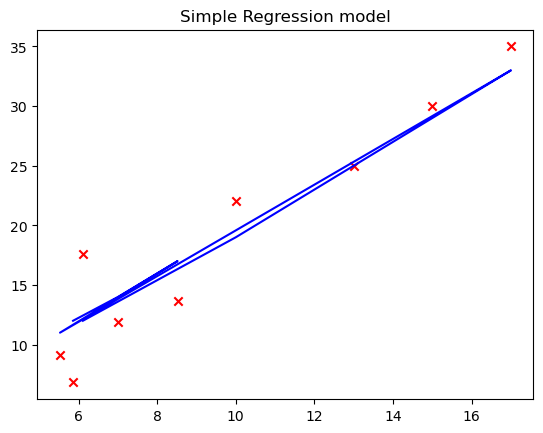

In [111]:
# visualize the results
plt.plot(x_train,predicted,color = 'b')
plt.scatter(x_train,y_train,marker='x',color ='r')
plt.title("Simple Regression model")